In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Initializing the K centers
def init_centers(X, k):
    from numpy.random import choice
    samples = choice(len(X), k, replace=False)
    return X[samples, :]

In [3]:
#Computing the distance
def distances(X, centers):
    m = len(X)
    k = len(centers)
    S = np.empty((m, k))
    for i in range(m):
        d = np.linalg.norm(X[i,:]-centers, ord=2, axis=1)
        S[i, :] = d**2
    return S

In [4]:
#Assign points to clusters
def assign_cluster(S):
    return np.argmin(S, axis=1)


In [5]:
#Update the centers
def update_centers(X, y):
    m, d = X.shape
    k = max(y) + 1
    centers = np.empty((k, d))
    for i in range(k):
        centers[i, :] = np.mean(X[y==i, :], axis=0)
    return centers


In [6]:
#within-cluster-sum-of-squares
def WCSS(S):
    return np.sum(np.amin(S, axis=1))

In [7]:
#Implement K-means algorithm
def has_converged(old_centers, new_centers):
    return set([tuple(x) for x in old_centers]) == set([tuple(x) for x in new_centers])

def k_means(X, k):
    converged = False
    labels = np.zeros(len(X))
    i = 1
    centers = init_centers(X, k)
    while (not converged):
        old_centers = centers
        S = distances(X, centers)
        labels = assign_cluster(S)
        centers = update_centers(X, labels)
        converged = has_converged(old_centers, centers)
        print('iteration', i, 'WCSS =', WCSS(S))
        i += 1
    return labels

Shape of the matrix of the image:
(225, 225, 3)
iteration 1 WCSS = 179918458.0
iteration 2 WCSS = 119911952.42326121
iteration 3 WCSS = 114535407.77521014
iteration 4 WCSS = 101803788.60192621
iteration 5 WCSS = 96557107.45258859
iteration 6 WCSS = 91896941.41267008
iteration 7 WCSS = 83594761.78612588
iteration 8 WCSS = 68663536.46273911
iteration 9 WCSS = 51965870.9904269
iteration 10 WCSS = 45054541.39902536
iteration 11 WCSS = 43417253.17478826
iteration 12 WCSS = 43185913.60945564
iteration 13 WCSS = 43165137.460597776
iteration 14 WCSS = 43163355.812355906
iteration 15 WCSS = 43163050.49951881
iteration 16 WCSS = 43163046.895382926
iteration 17 WCSS = 43163046.18875197


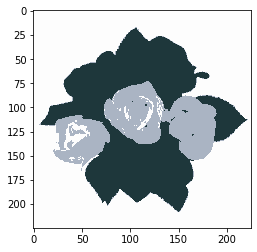

In [8]:
#Image compression using K-means clustering
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline

img_array = np.array(Image.open('download.jpg'), dtype='int32')
r, c, l = img_array.shape
print('Shape of the matrix of the image:')
print(img_array.shape)

img_reshaped = np.reshape(img_array, (r*c, l), order='C')

#define the number of clusters: k
k = 3
labels = k_means(img_reshaped, k)
ind = np.column_stack((img_reshaped, labels))
centers = {}
for i in set(labels):
    c_val = ind[ind[:, 3] == i].mean(axis=0)
    centers[i] = c_val[:3]
img_clustered = np.array([centers[i] for i in labels])
img_disp = np.reshape(img_clustered, (r, c, l), order='C')

def display_image(array):
    array = array.astype(dtype='uint8')
    img = Image.fromarray(array, 'RGB')
    imshow(np.asarray(img))
display_image(img_disp)
